In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

In [2]:
data=np.genfromtxt("mus.csv",delimiter=",",skip_header=1)

nlike=data[:,3]
ellike=data[:,6]
erlike=data[:,9]
sllike=data[:,12]
srlike=data[:,15]
tlike=data[:,18]


mask = (tlike>0.8) & (srlike>0.8) & (sllike>0.8)


nx=data[:,1][mask]
ny=data[:,2][mask]

elx=data[:,4][mask]
ely=data[:,5][mask]

erx=data[:,7][mask]
ery=data[:,8][mask]

slx=data[:,10][mask]
sly=data[:,11][mask]

srx=data[:,13][mask]
sry=data[:,14][mask]

tx=data[:,16][mask]
ty=data[:,17][mask]



Smidx=slx+(srx-slx)/2
Smidy=sly+(sry-sly)/2
midx=tx+(Smidx-tx)/2
midy=ty+(Smidy-ty)/2





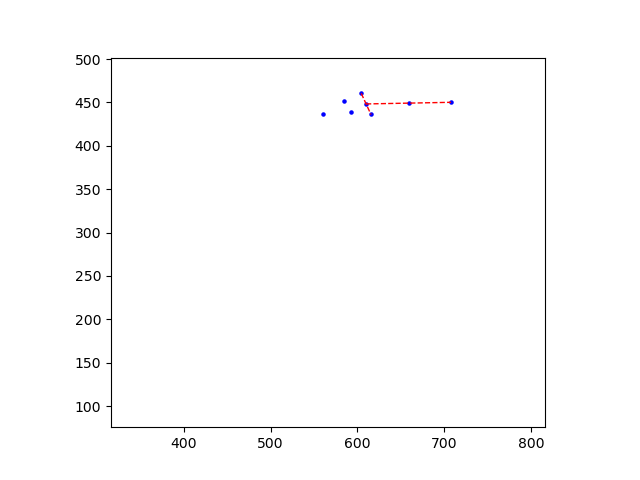

In [ ]:
fig, ax = plt.subplots()

nose = ax.scatter(nx[0], ny[0], c="b", s=5)
leftear = ax.scatter(elx[0], ely[0], c="b", s=5)
rightear = ax.scatter(erx[0], ery[0], c="b", s=5)
leftshoulder = ax.scatter(slx[0], sly[0], c="b", s=5)
rightshoulder = ax.scatter(srx[0], sry[0], c="b", s=5)
tailbase = ax.scatter(tx[0], ty[0], c="b", s=5)
shouldermid= ax.scatter(Smidx[0], Smidy[0], c="b", s=5)
mid=ax.scatter(midx[0], midy[0], c="b", s=5)
liness, = ax.plot([slx[0], srx[0]], [sly[0], sry[0]], "r--",lw=1)
linesmt, = ax.plot([Smidx[0], tx[0]], [Smidy[0], ty[0]], "r--", lw=1)
mid_x_history = []
mid_y_history = []
midtrail, = ax.plot([], [], "g-", lw=1)

ax.set_aspect("equal", adjustable="box")


ax.set_xlim(np.nanmin(nx)-10, np.nanmax(nx)+10)
ax.set_ylim(np.nanmin(ny)-10, np.nanmax(ny)+10)

def update(frame):
    mid_x_history.append(midx[frame])
    mid_y_history.append(midy[frame])
    midtrail.set_data(mid_x_history, mid_y_history)
    nose.set_offsets([nx[frame], ny[frame]])
    leftear.set_offsets([elx[frame], ely[frame]])
    rightear.set_offsets([erx[frame], ery[frame]])
    leftshoulder.set_offsets([slx[frame], sly[frame]])
    rightshoulder.set_offsets([srx[frame], sry[frame]])
    tailbase.set_offsets([tx[frame], ty[frame]])
    shouldermid.set_offsets([Smidx[frame], Smidy[frame]])
    mid.set_offsets([midx[frame], midy[frame]])
    liness.set_data([slx[frame], srx[frame]], [sly[frame], sry[frame]])
    linesmt.set_data([Smidx[frame], tx[frame]], [Smidy[frame], ty[frame]])

    return (
    nose, leftear, rightear, leftshoulder, rightshoulder,
    tailbase, shouldermid, mid, liness, linesmt, midtrail
)


ani = animation.FuncAnimation(fig=fig, func=update, frames=range(0,len(midx),5), interval=30, blit=True)
